# Интернет-магазин «В один клик» 
## Инструкция по выполнению проекта

## Решать задачу вам нужно в два этапа:

1. **Разработайте модель**, которая предскажет вероятность снижения покупательской активности.
2. **Выделите сегмент покупателей**, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.

Ниже несколько примеров сегментов, но вы также можете выделить свой:

- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наибольшей высокой прибыльностью.

## Шаг 1. Загрузка данных

### 1.1 Загрузите данные.
Файлы `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv` доступны по ссылкам в описании данных или через пути к ним:
- `/datasets/market_file.csv`
- `/datasets/market_money.csv`
- `/datasets/market_time.csv`
- `/datasets/money.csv`

**Обратите внимание:** в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.

### 1.2 Проверьте, что данные в таблицах соответствуют описанию.
Исследованием и объединением данных вы займётесь позже.

## Шаг 2. Предобработка данных

Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

## Шаг 3. Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

## Шаг 4. Объединение таблиц

### 4.1 Объедините таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`.
Данные о прибыли из файла `money.csv` при моделировании вам не понадобятся.

### 4.2 Учтите, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов.
В итоговой таблице сделайте отдельный столбец для каждого периода.

## Шаг 5. Корреляционный анализ

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

## Шаг 6. Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

### 6.1 Во время подготовки данных используйте `ColumnTransformer`.
Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.

**Напоминаем**, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

### 6.2 Обучите четыре модели:
- `KNeighborsClassifier()`
- `DecisionTreeClassifier()`
- `LogisticRegression()`
- `SVC()`

Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

### 6.3 Выберите лучшую модель, используя заданную метрику.
Для этого примените одну из стратегий:
- Использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно.
- Использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

## Шаг 7. Анализ важности признаков

### 7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.

### 7.2 Сделайте выводы о значимости признаков:
- Какие признаки мало значимы для модели;
- Какие признаки сильнее всего влияют на целевой признак;
- Как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

## Шаг 8. Сегментация покупателей

### 8.1 Выполните сегментацию покупателей.
Используйте результаты моделирования и данные о прибыльности покупателей.

### 8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность:
- Проведите графическое и аналитическое исследование группы покупателей.
- Сделайте предложения по работе с сегментом для увеличения покупательской активности.

### 8.3 Сделайте выводы о сегментах:
- Какой сегмент вы взяли для дополнительного исследования;
- Какие предложения вы сделали и почему.

## Шаг 9. Общий вывод

Сделайте общий вывод:
- Опишите задачу;
- Опишите исходные данные и проведённую предобработку;
- Напишите, что вы сделали для поиска лучшей модели;
- Укажите лучшую модель;
- Добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.


### Шаг 1. Загрузка данных

### Импорт библиотек

In [357]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Загрузка данных

In [358]:
try:
    market_file = pd.read_csv('datasets/market_file.csv')
    market_money = pd.read_csv('datasets/market_money.csv')
    market_time = pd.read_csv('datasets/market_time.csv')
    money = pd.read_csv('datasets/money.csv', sep=';')
except FileNotFoundError:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';')

In [359]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [360]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [361]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [362]:
money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


### Предобработка данных

In [363]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [364]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [365]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [366]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [367]:
money['Прибыль'] = money['Прибыль'].str.replace(',', '.').astype('float')

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Привели столбец 'Прибыль' в датафрейме money к типу float.

In [368]:
# market_file
print(f'Количество дубликатов в market_file: {market_file.duplicated().sum()}')

# market_money
print(f'Количество дубликатов в market_money: {market_money.duplicated().sum()}')

# market_time
print(f'Количество дубликатов в market_time: {market_time.duplicated().sum()}')

# money
print(f'Количество дубликатов в money: {money.duplicated().sum()}')

Количество дубликатов в market_file: 0
Количество дубликатов в market_money: 0
Количество дубликатов в market_time: 0
Количество дубликатов в money: 0


Обработка неявных дубликатов

In [369]:
market_file.loc[market_file['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'
market_time.loc[market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'

### Исследовательский анализ данных

Анализ таблицы market_file

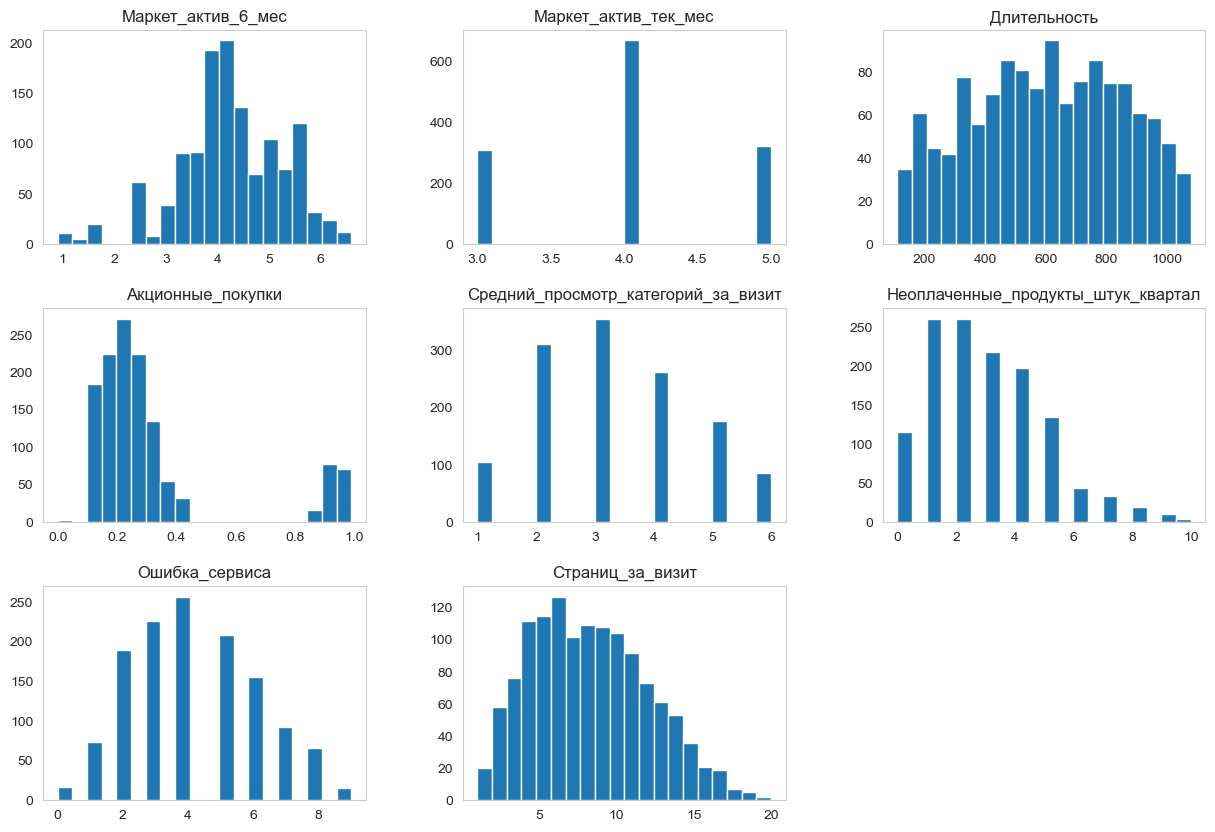

In [370]:
# Построим гистограммы для всех количественных признаков
market_file.drop('id', axis=1).hist(figsize=(15, 10), bins=20, grid=False);

Маркет актив 6 мес - больше всего людям приходило 4 маркетинговых сообщения за последние 6 месяцев. <br>
Маркет актив текущий месяц - людям пришло от 3 до 5 маркетинговых сообщений. Больше всего пришло 4 сообщения.<br>
Длительность - большинство людей провели на сайте от 0 до 800 секунд.<br>
Акционные покупки - больше всего процентов приходится на 20-30% акционных покупок.<br>
Средний просмотр категорий за визит - больше всего люди просматривают 2-3 категории за визит.<br>
Неоплаченные продукты штук квартал - больше всего люди не оплачивают 1-2 продукта за квартал.<br>
Ошибка сервиса - больше всего люди сталкиваются с 4 ошибками сервиса.<br>
Страниц за визит - больше всего люди просматривают 6-7 страниц за визит.

Анализ таблицы market_money

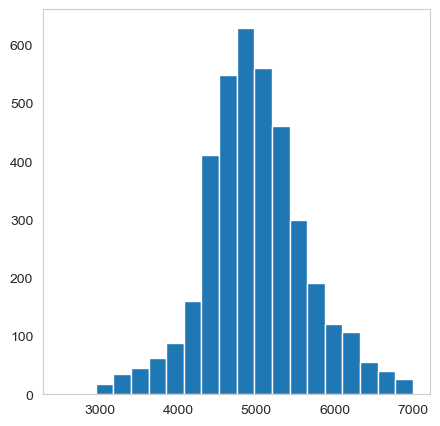

In [371]:
# Построим гистограммы для выручки (единственного количественного признака)
market_money['Выручка'].hist(figsize=(5, 5), bins=20, grid=False, range=(2500, 7000));

Пик выручки приходится на 5000 рублей.

Анализ таблицы market_time

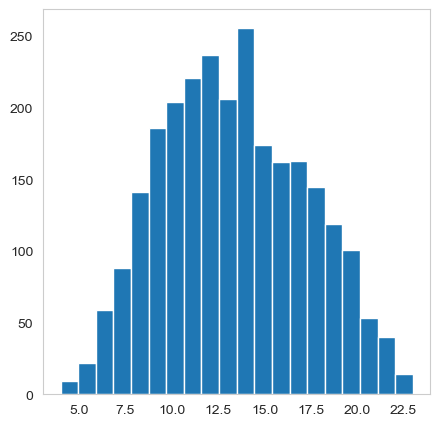

In [372]:
# Построим гистограмму для минут проведённых на сайте
market_time['минут'].hist(figsize=(5, 5), bins=20, grid=False);

Среднее время проведённое на сайте - от 10 до 15 минут

Отберём только клиентов с покупательской активностью не менее трёх месяцев

In [373]:
active_clients = market_money.groupby('id').size().reset_index(name='months_active')
active_clients_3_months = active_clients.query('months_active >= 3')

active_clients_3_months

,id,months_active
0,215348,3
1,215349,3
2,215350,3
3,215351,3
4,215352,3
...,...,...
1295,216643,3
1296,216644,3
1297,216645,3
1298,216646,3


### Объединение таблиц

In [374]:
market_money_pivot = market_money.pivot(index='id', columns='Период', values='Выручка').reset_index()
market_money_pivot.columns = ['id', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц']
market_time_pivot = market_time.pivot(index='id', columns='Период', values='минут').reset_index()
market_time_pivot.columns = ['id', 'минут_текущий_месяц', 'минут_предыдущий_месяц']

market = market_file.merge(market_money_pivot, on='id', how='left') \
    .merge(market_time_pivot, on='id', how='left')

market

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


### Корреляционный анализ

In [375]:
quantitative_columns = market.select_dtypes(include=['float64', 'int64']).columns
quantitative_columns = quantitative_columns.drop('id')
quantitative_columns

Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'минут_текущий_месяц',
       'минут_предыдущий_месяц'],
      dtype='object')

In [376]:
category_columns = market.select_dtypes(include='object').columns
category_columns

Index(['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Популярная_категория'],
      dtype='object')

In [377]:
market_corr = market[quantitative_columns].corr()
market_corr

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
Маркет_актив_6_мес,1.000000,0.057469,-0.037766,-0.241365,0.201562,-0.163848,0.034661,0.314643,0.019937,0.206063,-0.062952,0.288192,0.221702
Маркет_актив_тек_мес,0.057469,1.000000,-0.139361,-0.009759,-0.021232,0.054017,0.088260,0.001762,-0.053884,-0.073931,-0.005786,0.010391,-0.068594
Длительность,-0.037766,-0.139361,1.000000,0.017700,-0.057826,-0.091042,0.110566,-0.034672,0.038831,0.011116,0.009147,-0.120759,0.094881
Акционные_покупки,-0.241365,-0.009759,0.017700,1.000000,-0.172305,0.191364,-0.025345,-0.302874,0.018051,-0.129240,0.070830,-0.270117,-0.214618
Средний_просмотр_категорий_за_визит,0.201562,-0.021232,-0.057826,-0.172305,1.000000,-0.274808,0.004046,0.237568,-0.049631,0.093677,-0.027404,0.135039,0.225304
Неоплаченные_продукты_штук_квартал,-0.163848,0.054017,-0.091042,0.191364,-0.274808,1.000000,-0.091154,-0.193587,-0.001609,-0.208510,-0.000218,-0.182601,-0.206636
Ошибка_сервиса,0.034661,0.088260,0.110566,-0.025345,0.004046,-0.091154,1.000000,0.086832,0.033674,0.055515,0.007753,0.186069,0.070586
Страниц_за_визит,0.314643,0.001762,-0.034672,-0.302874,0.237568,-0.193587,0.086832,1.000000,-0.021727,0.268683,-0.015697,0.425139,0.255336
выручка_текущий_месяц,0.019937,-0.053884,0.038831,0.018051,-0.049631,-0.001609,0.033674,-0.021727,1.000000,0.438668,0.268952,-0.058480,-0.038865
выручка_предыдущий_месяц,0.206063,-0.073931,0.011116,-0.129240,0.093677,-0.208510,0.055515,0.268683,0.438668,1.000000,0.048374,0.290483,0.264266


<Axes: >

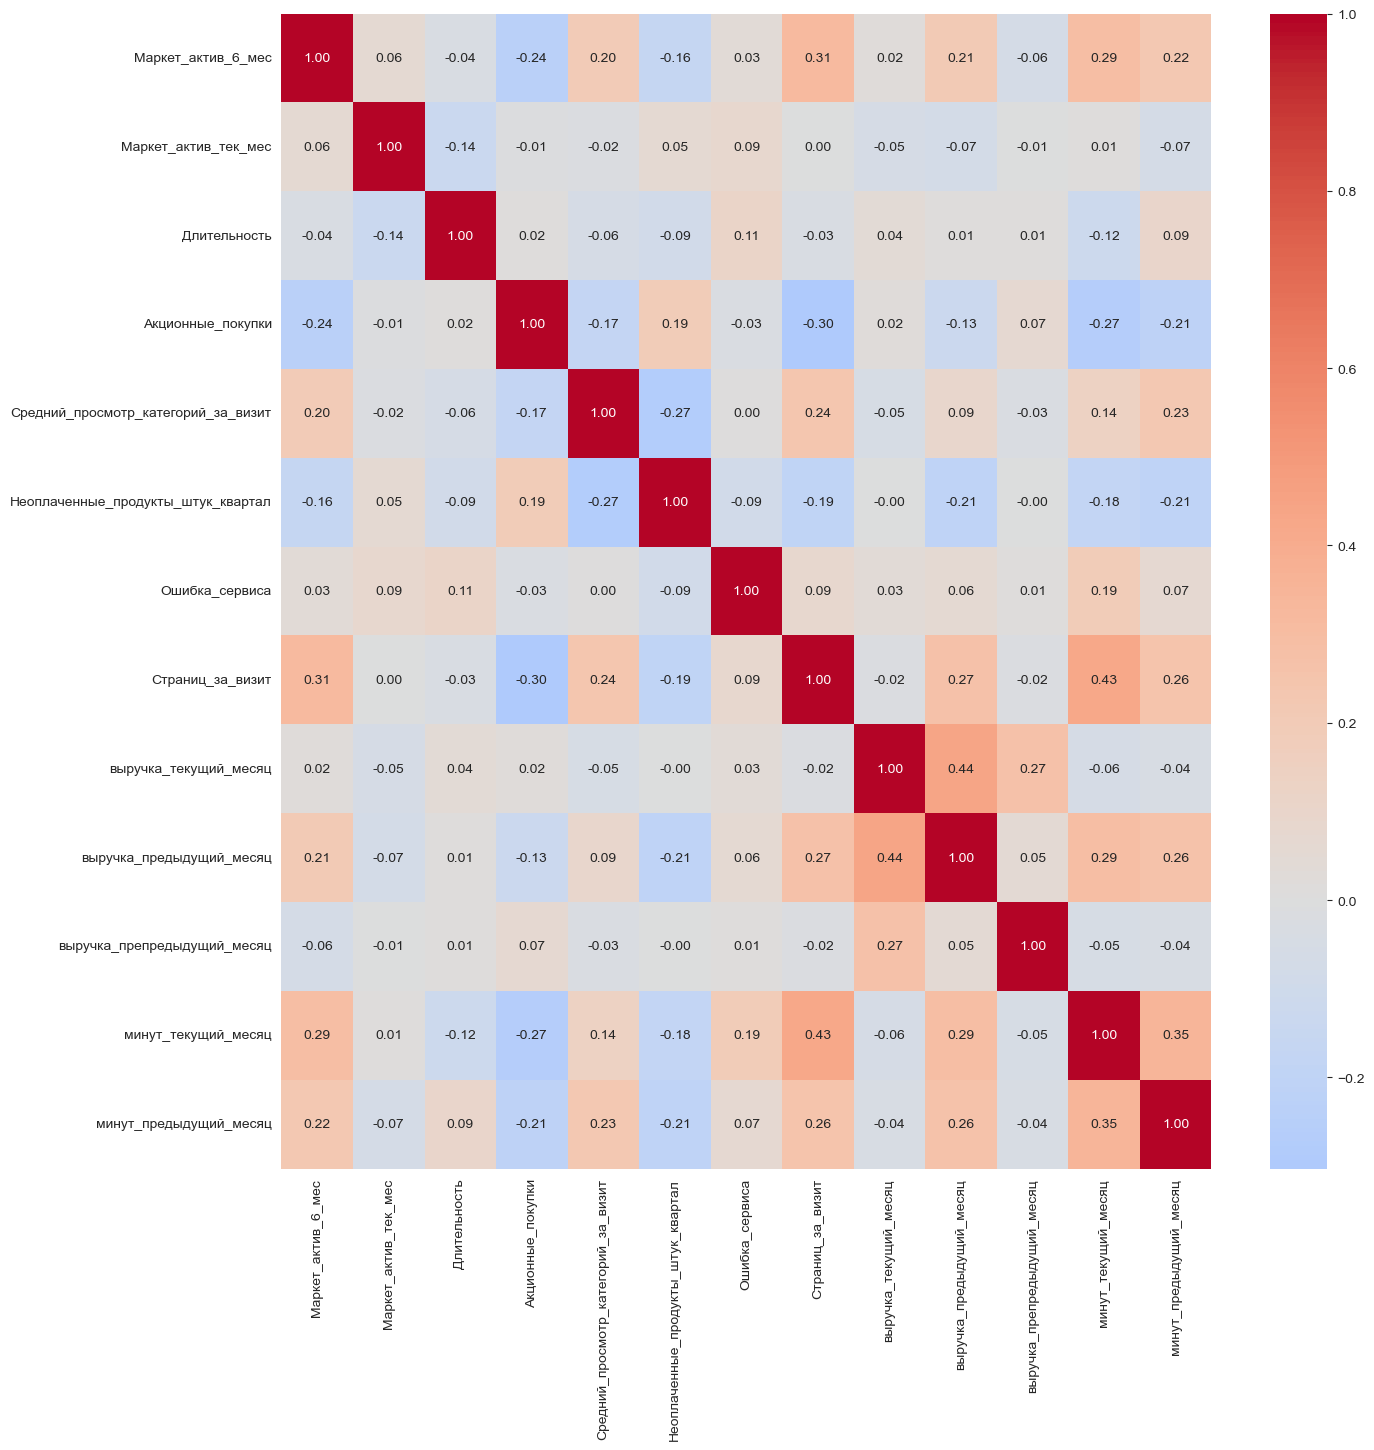

In [378]:
plt.figure(figsize=(15, 15))
sns.heatmap(market_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)

Мультиколлинеарности не наблюдается. Нет значений, близких к 1 или -1.

### Использование пайплайнов

In [379]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [380]:
X = market.drop(['id', 'Покупательская активность'], axis=1)
y = market['Покупательская активность']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

In [381]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (975, 16)
X_test shape: (325, 16)


In [382]:
X_train.head()

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
187,стандарт,нет,2.6,3,302,0.31,Товары для детей,2,1,1,7,4430.0,4586.0,4667.9,7,9
819,стандарт,нет,4.4,5,791,0.24,Кухонная посуда,3,1,4,8,5132.5,4555.0,5763.0,12,20
893,премиум,да,6.1,3,668,0.17,Домашний текстиль,6,4,4,14,5159.5,5014.0,5415.6,10,11
348,премиум,да,3.4,3,384,0.98,Кухонная посуда,1,9,4,3,5728.5,4779.0,6457.8,16,11
1069,премиум,да,4.6,3,485,0.23,Мелкая бытовая техника и электроника,2,5,7,13,4163.5,4486.0,4014.0,20,11


In [383]:
ohe_columns = ['Популярная_категория']
ord_columns = ['Тип сервиса', 'Разрешить сообщать']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
               'выручка_препредыдущий_месяц', 'минут_текущий_месяц',
               'минут_предыдущий_месяц']

Создадим пайплайн и обучим модели

OneHotEncoder Pipe. SimpleImputer + OneHotEncoder

In [384]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))]
)

OrdinalEncoder Pipe. SimpleImputer + OrdinalEncoder

In [385]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(
         categories=[
             ['премимум', 'стандарт'],
             ['да', 'нет']
         ],
         handle_unknown='use_encoded_value', unknown_value=np.nan
     )
      ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
     ]
)

MinMaxScaler

In [386]:
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
     ('minMaxScaler', MinMaxScaler())]
)

Data Preprocessor (OHE + MinMaxScaler)

In [387]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)],
    remainder='passthrough'
)

Final pipeline

In [388]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим param_grid

In [389]:
param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 5),
        'models__kernel': ['linear', 'poly', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [390]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImpu...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__kernel': ['linear', 'poly',
                                                            'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Выберем метрику roc_auc, так как перед нами стоит задача бинарной классификации и данные несбалансированные.

In [391]:
best_model = randomized_search.best_estimator_

In [392]:
print('Лучшая модель и её параметры:\n\n', best_model)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

In [393]:
y_test_pred_proba = best_model.predict_proba(X_test)
# Предположим, что "Снизилась" — это класс с меткой 1, и он находится во втором столбце
y_test_pred_proba_class1 = y_test_pred_proba[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba_class1)}')

Метрика ROC-AUC на тестовой выборке: 0.9112100786390629


Лучшая модель - SVC с параметрами:
- C = 3
- kernel = 'rbf' (default)
- probability = True

Метрика roc_auc составила 91.12%

### Анализ важности признаков

In [394]:
ohe = best_model.named_steps['preprocessor'].named_transformers_['ohe']
encoded_features = ohe.get_feature_names_out()
normal_features = X_train.drop(ohe_columns, axis=1).columns.tolist()
feature_names = np.concatenate([normal_features, encoded_features])
feature_names

array(['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес',
       'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'выручка_текущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
       'минут_текущий_месяц', 'минут_предыдущий_месяц',
       'Популярная_категория_Косметика и аксесуары',
       'Популярная_категория_Кухонная посуда',
       'Популярная_категория_Мелкая бытовая техника и электроника',
       'Популярная_категория_Техника для красоты и здоровья',
       'Популярная_категория_Товары для детей'], dtype=object)

In [395]:
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Выбираем небольшую выборку тестовых данных
test_sample = shap.sample(X_train_transformed, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


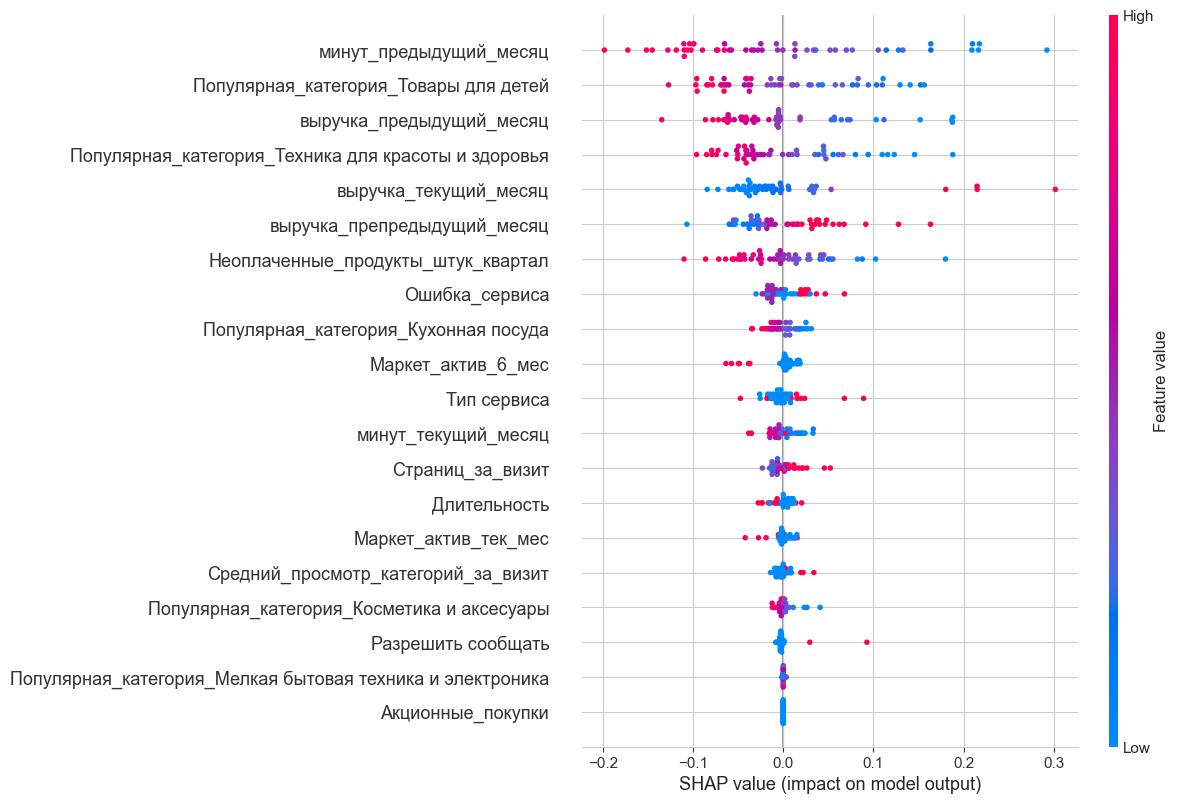

In [396]:
explainer = shap.KernelExplainer(best_model.named_steps['models'].predict_proba, test_sample)

shap_values = explainer.shap_values(test_sample)
shap_explanation = shap.Explanation(
    values=shap_values[1],  
    base_values=explainer.expected_value[1], 
    data=test_sample, 
    feature_names=feature_names 
)
# Строим beeswarm-график для положительного класса (class 1)
shap.plots.beeswarm(shap_explanation, max_display=20)

Вывод по важности признаков: <br>
- Самый важный признак - минуты проведённые на сайте в предыдущем месяце. <br>
- Следующий по важности признак - популярная категория товары для детей. <br>
- Третий по важности признак - выручка за предыдущий месяц. <br>
Эти признаки больше всего влияют на целевой признак. <br>
- Наименее важные признаки - Акционные покупки и разрешать сообщать о маркетинговых акциях <br>

Можно использовать эти наблюдения для моделирования и принятия бизнес-решений. 

### Сегментация покупателей

Добавим результаты предсказаний в исходный датафрейм

In [398]:
y_prob = best_model.predict_proba(X)
# Создаем столбец "Снижение покупательской активности в будущем" на основе порога 0.5
market['Снижение покупательской активности в будущем'] = pd.Series(y_prob[:, 1]).apply(
    lambda x: 'Снизится' if x > 0.5 else 'Останется прежней'
)
market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц,Снижение покупательской активности в будущем
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14,Снизится
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Снизится
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Останется прежней
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Снизится
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Снизится


Сегментация клиентов на группы

<b>Группа 1</b> - Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. <br>
<b>Группа 2</b> - Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом. <br>
<b>Группа 3</b> - Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей». <br>
<b>Группа 4</b> - Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. <br>
<b>Группа 5</b> (новая) - Группа клиентов, активно использующих премиальные сервисы и с высокой вероятностью снижения покупательской активности. <br>

In [404]:
market.loc[(market['Акционные_покупки'] > 0.5) & (market['Снижение покупательской активности в будущем'] == 'Снизится'), 'Группа'] = 'Группа 1'
market.loc[(market['Тип сервиса'] == 'техника'), 'Группа'] = 'Группа 2'
market.loc[(market['Популярная_категория'].isin(['товары для себя', 'товары для детей'])), 'Группа'] = 'Группа 3'
market.loc[(market['Снижение покупательской активности в будущем'] == 'Снизится') & (market['выручка_текущий_месяц'] > 5000), 'Группа'] = 'Группа 4'
market.loc[(market['Тип сервиса'] == 'премиум') & (market['Снижение покупательской активности в будущем'] == 'Снизится'), 'Группа'] = 'Группа 5'

# Заполняем оставшиеся строки как "Другая"
market['Группа'] = market['Группа'].fillna('Другая')

market

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц,Снижение покупательской активности в будущем,Группа
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14,Снизится,Группа 5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Снизится,Группа 5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Останется прежней,Другая
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Снизится,Группа 4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Снизится,Группа 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,Останется прежней,Другая
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,Останется прежней,Другая
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,Останется прежней,Другая
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,Останется прежней,Другая


In [402]:
market['Группа'].value_counts()

Группа
Другая      965
Группа 5    153
Группа 4    138
Группа 1     44
Name: count, dtype: int64

Исследуем подробнее группу 5 (Группа клиентов, активно использующих премиальные сервисы и с высокой вероятностью снижения покупательской активности)

In [405]:
group_5 = market[market['Группа'] == 'Группа 5']

group_5.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,215588.928105,3.576471,3.993464,719.261438,0.501830,2.490196,3.888889,4.111111,5.006536,5068.045752,4637.117647,6101.054902,9.732026,10.156863
std,210.750760,1.066584,0.729967,219.879925,0.315137,1.082867,2.234760,1.985326,2.110428,919.766883,452.813732,8249.775329,2.769682,3.041636
min,215348.000000,0.900000,3.000000,121.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2758.700000,5.000000,4.000000
25%,215453.000000,3.000000,3.000000,557.000000,0.250000,2.000000,2.000000,3.000000,4.000000,4613.500000,4472.000000,4881.000000,8.000000,8.000000
50%,215551.000000,3.800000,4.000000,759.000000,0.350000,2.000000,4.000000,4.000000,5.000000,5216.000000,4660.000000,5484.800000,10.000000,10.000000
75%,215664.000000,4.100000,5.000000,875.000000,0.930000,3.000000,5.000000,6.000000,6.000000,5752.500000,4838.000000,6125.300000,11.000000,12.000000
max,216636.000000,5.800000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,12.000000,6869.500000,5555.000000,106862.200000,20.000000,21.000000


In [407]:
all_except_group_5 = market[market['Группа'] != 'Группа 5']

all_except_group_5.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,216052.000000,4.344115,4.013949,586.243243,0.295527,3.374019,2.700087,4.195292,8.599826,4919.429381,4850.296425,5210.102616,13.965998,13.611160
std,358.619483,0.973160,0.692629,249.531619,0.229281,1.354504,1.891201,1.951921,3.978270,710.793483,392.779069,821.670858,3.794190,4.190342
min,215350.000000,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2952.200000,5.000000,4.000000
25%,215774.500000,3.850000,4.000000,384.000000,0.160000,2.000000,1.000000,3.000000,6.000000,4493.750000,4604.500000,4694.100000,11.000000,10.000000
50%,216069.000000,4.300000,4.000000,585.000000,0.240000,3.000000,2.000000,4.000000,8.000000,4987.000000,4833.000000,5149.400000,14.000000,14.000000
75%,216356.500000,5.000000,4.000000,788.000000,0.300000,4.000000,4.000000,6.000000,11.000000,5370.750000,5101.000000,5693.500000,17.000000,17.000000
max,216647.000000,6.600000,5.000000,1064.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6809.000000,5663.000000,7799.400000,23.000000,23.000000


- Активность за последние 6 месяцев и в текущем месяце меньше, чем у остальных групп. <br>
- Средняя длительность на сайте также меньше, чем у остальных групп. <br>
- Доля акционных покупок у группы 5 больше, чем у остальных групп. <br>
- Средний просмотр категорий за визит у группы 5 меньше, чем у остальных групп. <br>
- Неоплаченные продукты штук квартал у группы 5 больше, чем у остальных групп. <br>
- Страниц за визит у группы 5 меньше, чем у остальных групп. <br>
- Выручка за текущий и препредыдущий месяц от группы 5 больше, чем у остальных, но за предыдущий месяц меньше. <br>
- Минут проведённых на сайте в текущем месяце и предыдущем месяце у группы 5 меньше, чем у остальных групп. <br>

#### Вывод <br>
Группа 5 меньше проводят времени на сайте, меньше просматривают страниц за визит, но при этом делают больше акционных покупок и имеют больше неоплаченных продуктов. Выручка от группы 5 больше, чем от остальных групп. <br>

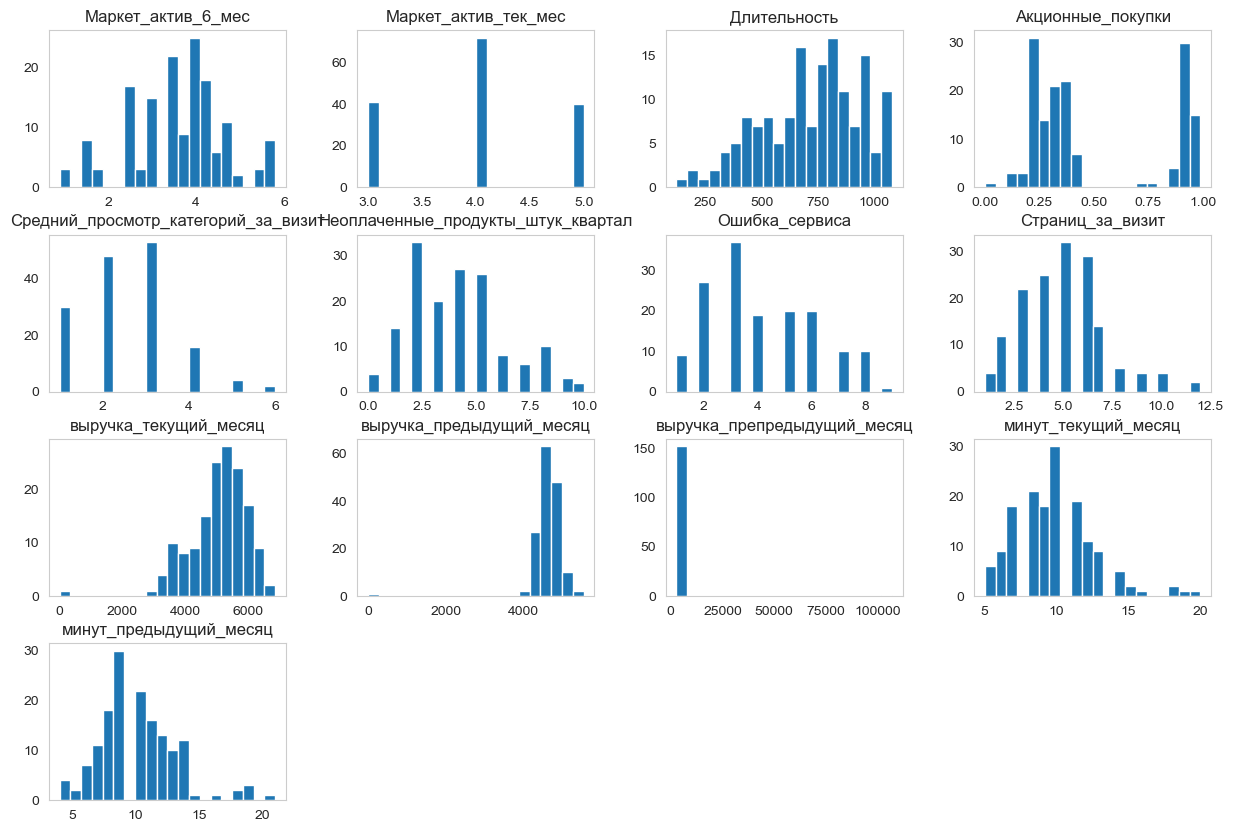

In [406]:
# Построим гистограммы для всех количественных признаков
group_5.drop('id', axis=1).hist(figsize=(15, 10), bins=20, grid=False);

#### Рекомендации для увелечения прибыли от группы 5 <br>
Группе 5 можно чаще предлагать акционные товары, так как они чаще их покупают. <br>
Группа 5 лучше понимают чего они хотят, поэтому можно настроить более точные индивидуальные предложения. 

### Общий вывод <br>
В ходе исследования были проведены следующие шаги: <br>
- Были загружены и предобработаны данные из 4 csv файлов. <br>
- Проведен исследовательский анализ данных. <br>
- Данные объединены в один датафрейм. <br>
- Проведен корреляционный анализ. <br>
- Использованы пайплайны для обучения 4 моделей: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC. <br>
- Выбрана лучшая модель - SVC с метрикой roc_auc 91.12%. <br>
- Выполнен анализ важности признаков с помощью SHAP. <br>
- Проведена сегментация покупателей. <br>

Задача состояла в том, чтобы разработать модель, которая предскажет вероятность снижения покупательской активности и выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. <br> Данные были загружены, предобработаны, объединены в один датафрейм. Проведен корреляционный анализ. Использованы пайплайны для обучения 4 моделей, с помощью RandomizedSearchCV была выбрана лучшая модель - SVC с метрикой roc_auc 91.12%. Проведен анализ важности признаков с помощью SHAP. Проведена сегментация покупателей. <br> <br> Дополнительно был проведён анализ группы 5 (Группа клиентов, активно использующих премиальные сервисы и с высокой вероятностью снижения покупательской активности). <br> <br> Для увеличения прибыли от группы 5 можно чаще предлагать акционные товары, так как они чаще их покупают. Группа 5 лучше понимают чего они хотят, поэтому можно настроить более точные индивидуальные предложения. <br> <br> В целом, задача выполнена, были получены результаты и даны рекомендации для увеличения прибыли от группы 5. <br>